# MCT4052 Workshop 4c: Artificial Neural Network Regressor

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This notebook includes the a regression problem similar to Workshop 4a and 4b, but in this case we use a more [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to predict 2 target values.

Predicting multiple quantities is possible with the MLP Regressor due to the flexibility of the the MLP Regressor architecture, which is an ANN designed to solve regression tasks. This is not possible with the regressors used in the previous notebooks. Compared to the MLP classifier, we can have at the output an arbitrary number of neurons (with fixed linear - aka identity - activation function) determined by the number of target values we try to predict.

In [1]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import os
import sklearn

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
sr = 22050

#Instead of writing the code to extract the features and target value we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#For practicality, the vector features are flattenedm so that that can be stored on a row of a N-dim array

#Mind that the file name is not important here because there is no label to consider (as in the previous examples)

def extract_features_targets(filename, sr):
    
    signal, dummy = librosa.load(filename, sr, mono=True)
    
    features = librosa.feature.melspectrogram(signal, sr=sr)
    features = features.flatten()
    
    #preparing the output array
    targets = np.zeros((1,2))
    targets[0,0] = np.mean(librosa.feature.rms(signal))
    targets[0,1] = np.mean(librosa.feature.spectral_flatness(signal))
    
    return features, targets


#creating an array of zeros of the proper size where we will store computed features and lables
filenames = os.listdir('./data/examples3')

#to set the right number of columns, we call the extract_features_target() function and get the size of the features
num_of_features = extract_features_targets('./data/examples3/'+filenames[0], sr)[0].size
num_of_targets = extract_features_targets('./data/examples3/'+filenames[0], sr)[1].size
features = np.zeros((len(filenames),num_of_features)) 
targets = np.zeros((len(filenames),num_of_targets))

for i in range(len(filenames)):
    #print('processing',filenames[i])
    features[i,:], targets[i,:] = extract_features_targets('./data/examples3/'+filenames[i], sr)

print('Done!')

Done!


In [3]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, tar_train, tar_test = train_test_split(features, targets, test_size=0.3, random_state=5)

### Creating, training and testing the Multi Layer Perceptron (MLP) regressor

In [4]:
#Import the classifier
from sklearn.neural_network import MLPRegressor

##Creating an instance of a MLP regressor
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPRegressor(hidden_layer_sizes=(200,100,50), max_iter=200, tol=0.0001, activation='tanh', verbose=True)

#train the model
mlp.fit(feat_train, tar_train)

#applying the the model on the test data (features)
tar_pred = mlp.predict(feat_test)

Iteration 1, loss = 0.28658285
Iteration 2, loss = 0.89429308
Iteration 3, loss = 0.23667829
Iteration 4, loss = 0.07488943
Iteration 5, loss = 0.11105800
Iteration 6, loss = 0.11555750
Iteration 7, loss = 0.07837200
Iteration 8, loss = 0.04136553
Iteration 9, loss = 0.02379202
Iteration 10, loss = 0.02267821
Iteration 11, loss = 0.02321554
Iteration 12, loss = 0.02424362
Iteration 13, loss = 0.02228101
Iteration 14, loss = 0.01817333
Iteration 15, loss = 0.01335206
Iteration 16, loss = 0.00998075
Iteration 17, loss = 0.00937392
Iteration 18, loss = 0.00846580
Iteration 19, loss = 0.00803868
Iteration 20, loss = 0.00705826
Iteration 21, loss = 0.00591790
Iteration 22, loss = 0.00598726
Iteration 23, loss = 0.00604251
Iteration 24, loss = 0.00585980
Iteration 25, loss = 0.00533294
Iteration 26, loss = 0.00491076
Iteration 27, loss = 0.00444436
Iteration 28, loss = 0.00390434
Iteration 29, loss = 0.00371426
Iteration 30, loss = 0.00332058
Iteration 31, loss = 0.00298438
Iteration 32, los

### Displaying the loss curve over the training iterations and performance metrics

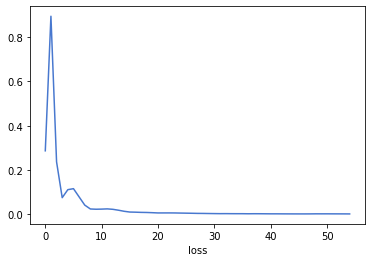

Mean squared error: 0.0287
Mean absolute error: 0.1092
Median absolute error: 0.0717
Coefficient of determination (R2 score): -1.1266
Explained variance score: -0.8968
R2 score on individual targets [-2.39789302  0.14477944]


In [5]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.xlabel('loss')
plt.show()

#computing a set of performance metrics

#mean squared error (lower the better)
print('Mean squared error: %.4f'% sklearn.metrics.mean_squared_error(tar_test, tar_pred))

#mean absolute error (lower the better)
print('Mean absolute error: %.4f'% sklearn.metrics.mean_absolute_error(tar_test, tar_pred))

#median absolute error (lower the better)
print('Median absolute error: %.4f'% sklearn.metrics.median_absolute_error(tar_test, tar_pred))

#coefficient of determination (r2 score): 1 is perfect prediction (it can get arbitrary negative)
print('Coefficient of determination (R2 score): %.4f'% sklearn.metrics.r2_score(tar_test, tar_pred))

#explained variance score: 1 is perfect prediction (it can get arbitrary worse)
print('Explained variance score: %.4f'% sklearn.metrics.explained_variance_score(tar_test, tar_pred))

#this is is a better represenation of the r2 score when working with multiple outputs
#as it provides a value for each target value
print('R2 score on individual targets',sklearn.metrics.r2_score(tar_test, tar_pred, multioutput='raw_values') )

### Follow-up activity

1. Explore the attributes of the "mlp" object and verify size of the network, input and output layers, and activation functions used throughout the network and at the output.

2. Make a fair assessment of the error, explore the dymanic range/magnitude of the target values versus the magnitude of the errors (and the performance metrics).

3. Try to change the MLP hyperparameters to see if performances can improve.

4. Reduce this regression progrem to the same presented in 4a and 4b (i.e. predict RMS only). Compare the performances with the other two regressors (ensure to use the same train/test split random state).

5. Use the three regressors from 4a, 4b, and 4c on your dataset (in a single notebook) and compare the performances (pick one metric only as reference). Also include also a 4th regression method from those available in [scikitlearn](https://scikit-learn.org/stable/supervised_learning.html).
